## <center>Trabalho de Aprendizado de Máquina- Previsão da resistência à compressão do concreto</center>

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

----------------------

## <center> Obtenção dos dados Dataframe </center>

Primeiramente, importa-se bibliotecas necessárias básicas para leitura do dataset

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos primeiramente ler a pasta que o python está lendo

In [13]:
os.getcwdb()

b'C:\\Users\\emanuel24039\\Downloads'

In [14]:
os.chdir('C:/Users/emanuel24039/Downloads')

Para ler o arquivo é necessário baixar xlrd, retire o "#" para instalar ao rodar a célula abaixo:

In [15]:

pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Agora, é lido o dataframe do arquivo excel

In [16]:
df = pd.read_excel("C:/Users/emanuel24039/Downloads/Concrete_Data.xls")
df = df.dropna() # Retira=se linhas que possuem dados NaN
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Descobre-se os nomes das colunas:

In [17]:
print(df.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


Será importante posteriormente no código, sabermos quais colunas são atributos e quais são target, assim, é separado em listas os nomes deles, o objetivo dessse trabalho é prever a resistência à compressão do concreto, o dataframe se refere a isso como "Concrete compressive strength(MPa, megapascals)", estre é o target do projeto. Todas as demais colunas são atributos.

In [18]:
ATRIBUTOS = ['Cement (component 1)(kg in a m^3 mixture)', 
             'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
             'Fly Ash (component 3)(kg in a m^3 mixture)',
             'Water  (component 4)(kg in a m^3 mixture)',
             'Superplasticizer (component 5)(kg in a m^3 mixture)',
             'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
             'Fine Aggregate (component 7)(kg in a m^3 mixture)',
             'Age (day)']

TARGET = ['Concrete compressive strength(MPa, megapascals) ']

Vamos agora separar os dados em dados de treino e teste, isso será importante ao longo de todo o código.

In [19]:
#Importar biblioteca para fazer a separação dos dados
from sklearn.model_selection import train_test_split

# 90% dos dados serão de treino e 10% de teste
TAMANHO_TESTE = 0.1

SEMENTE_ALEATORIA = 777

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(ATRIBUTOS, axis=1).values
Y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(ATRIBUTOS, axis=1).values
Y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()


----------------------

## <center> Introdução ao dados do Dataframe</center>

Antes de utilizar e apresentar os modelos preditivos de aprendizado de máquina sobre o dataframe, é necessário entender o que cada coluna significa, isto é, o que de fato é a resistência à compressão do concreto, o target deste trabalho, e os seus demais atributos.

##### O que é o Concreto?
 
Segundo a ASTM (American Society for Testing and Materials), o concreto é um material compósito que consiste de um meio aglomerante no qual estão aglutinadas partículas de diferentes naturezas. [1]
Além de quando está no estado fresco pode ser moldado a criatividade humana, podendo adquirir as mais diversas formas. E após passar pelo estado de endurecimento, adquire resistências similares a de rochas.

##### Aglomerantes:

Os aglomerantes no concreto são materiais capazes de ligar diferentes tipos de elementos ou agregados quando misturados com água, formando uma pasta homogênea que irá se petrificar dando origem a um corpo sólido.
Ao longo da história humana diferentes tipos de concretos já foram feitos a partir de uma variada gama de aglomerantes, o mais antigo e simples é a cal. Mas aquele que possibilitou que o concreto fosse usado em larga escala, sendo economicamente viável, e tendo características como alta resistência a compressão e resistente a água foi o cimento Portland, uma invenção relativamente recente do século XIX [2]. No dataset o aglomerante cimento é a coluna 'Ciment (component 1)(kg in a m^3 mixture)'.

##### Agregados:
Os agregados do concreto são os materiais responsáveis pelo preenchimento dele, ocupando de 60% a 80% de sua constituição. Além de ser através deles que o concreto tem sua resistência a compressão.
Eles podem ser classificados conforme sua natureza:
- Naturais: utilizados conforme são encontrados na natureza.
- Artificiais: suas formas são alteradas pelo homem.
E classificados quanto a suas dimensões:
    1. Agregados graúdos: maior que 4,75 mm. Exemplo: Brita. No dataset é a coluna: 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' que é a quantidade de agregado graúdo ou grosso em kilograma por metro cúbico.
    2. Agregados miúdos: menor que 4,75 mm. Exemplo: Areia. No dataset é a coluna: 'Fine Aggregate (component 7)(kg in a m^3 mixture)' que é a quantidade de agregado fino ou míudo em kilograma por metro cúbico. [3]

##### Cinzas Volantes (Fly Ash)
Cinzas volantes são partículas finas resultantes da queima de carvão em usinas termoelétricas. No concreto, elas funcionam como um aditivo pozolânico, que reage com a água e o hidróxido de cálcio gerado pela hidratação do cimento, formando compostos adicionais que aumentam a resistência e a durabilidade do concreto. As cinzas volantes também melhoram a trabalhabilidade e reduzem a permeabilidade do concreto. No dataset, as cinzas volantes estão representadas na coluna 'Fly Ash (component 4)(kg in a m^3 mixture)'. [4]

##### Escória de Alto-Forno (Blast Furnace Slag)
A escória de alto-forno é um subproduto da produção de ferro em altos-fornos e, ao ser moída finamente, torna-se uma adição mineral para o concreto. Quando misturada com o cimento Portland, a escória reage com a água e contribui para a formação de produtos hidratados que aumentam a resistência à compressão e reduzem a permeabilidade do concreto. No dataset, a escória de alto-forno é representada na coluna 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'.[4]

##### Água (Water)
A água é um dos componentes mais importantes na produção de concreto, pois desencadeia a hidratação do cimento, iniciando o processo de endurecimento. A quantidade de água afeta diretamente a consistência, trabalhabilidade e resistência do concreto. A água utilizada no concreto é representada no dataframe pela coluna 'Water (component 5)(kg in a m^3 mixture)' representa a quantidade de água em quilogramas por metro cúbico de mistura.[4]

##### Idade do Concreto (Age)
A resistência do concreto aumenta com o tempo devido ao processo de hidratação do cimento, que continua por longos períodos após o concreto ter endurecido. A "idade" refere-se ao tempo em dias que o concreto foi curado antes de testar sua resistência à compressão. Quanto maior o tempo de cura, em geral, maior é a resistência à compressão. No dataset, a idade é representada pela coluna 'Age (day)', indicando a idade do concreto em dias.[4]

##### Resistência à Compressão do Concreto (Compressive Strength)
A resistência à compressão é uma das propriedades mais importantes do concreto e é o principal parâmetro para avaliar sua qualidade e durabilidade. Ela mede a capacidade do concreto de suportar cargas aplicadas sem quebrar e é expressa em unidades de força por área, como MPa (megapascais). A resistência à compressão depende de vários fatores, como a proporção dos materiais, a qualidade dos agregados, a quantidade de água e o tempo de cura. Uma maior resistência indica que o concreto pode suportar maiores cargas, o que é essencial para garantir a segurança e a estabilidade de construções. No dataset, a coluna 'Concrete compressive strength(MPa, megapascals)' representa o valor da resistência à compressão do concreto, que é o alvo (target) previsto pelos modelos de aprendizado de máquina neste projeto. [4]

Dessa forma, é possível entender que o concreto possui diversas variáveis que alteram sua resistência à compressão, característica mais desejada e pesquisada sobre ele, assim será realizado diversos modelos e estudos para prever esse target.


----------------------

## <center> Matriz de Correlação </center>

A **matriz de correlação** é uma tabela que mostra a relação entre duas ou mais variáveis. Os valores de correlação variam de **-1** a **+1**:
- **+1** indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta de forma proporcional).
- **-1** indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).
- **0** indica que não há correlação entre as variáveis.

Valores próximos de **+1** ou **-1** indicam uma correlação forte, enquanto valores próximos de **0** indicam uma correlação fraca ou inexistente.

Vamos utiliza-lá para visualizar como os atributos se correlacionam com o target e com os próprios atributos. Para isso, vamos criar uma matriz de correlação através da biblioteca pandas, que permitirá a visualização das correlações em forma de tabela. Para melhor visualização do gráfico, iremos renomear as colunas do dataframe, reduzindo o tamanho dos seus nomes.

In [20]:
df_correlação = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cimento', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': "Escória de alto forno", 'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Cinzas volantes', 'Water  (component 4)(kg in a m^3 mixture)' : 'Água', 'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplastificante', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Agregado grosso', 'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Agregado fino', 'Concrete compressive strength(MPa, megapascals) ': 'Compressão do concreto', 'Age (day)': 'idade (dias)' })



In [21]:
Dados_Correlacao = df_correlação.reindex(['Cimento', 'Escória de alto forno', 'Cinzas volantes', 'Água', 'Superplastificante', 'Agregado grosso', 'Agregado fino', 'Compressão do concreto', 'idade (dias)'], axis=1)

matriz_cov = Dados_Correlacao.corr()

matriz_cov

,Cimento,Escória de alto forno,Cinzas volantes,Água,Superplastificante,Agregado grosso,Agregado fino,Compressão do concreto,idade (dias)
Cimento,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.497833,0.081947
Escória de alto forno,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,0.134824,-0.044246
Cinzas volantes,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.105753,-0.154370
Água,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,-0.289613,0.277604
Superplastificante,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,0.366102,-0.192717
Agregado grosso,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.164928,-0.003016
Agregado fino,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.167249,-0.156094
Compressão do concreto,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,1.000000,0.328877
idade (dias),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,0.328877,1.000000


Com ajuda do `seaborn`, podemos criar um gráfico que varia sua intensidade a depender da correlação:

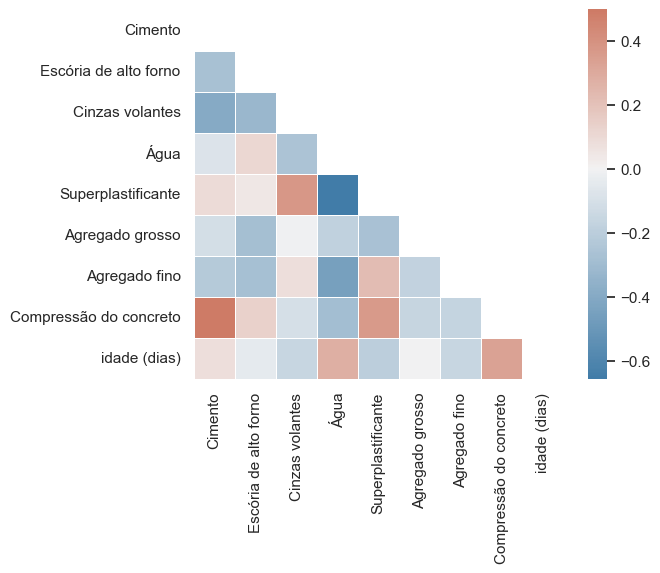

In [22]:
import seaborn as sns
import numpy as np

sns.set_theme(style="white")

m_corr = Dados_Correlacao.corr()
mascara = np.triu(np.ones_like(m_corr, dtype=bool))
mapa_de_cor = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(
    m_corr,
    mask=mascara,
    cmap=mapa_de_cor,
    center=0,
    square=True,
    linewidths=0.5,
);

#### Interpretação das Correlações Mais Impactantes

Na matriz de correlação entre os componentes do concreto e a resistência do concreto, as correlações mais significativas são:

1. **Cimento e resistência do concreto (target)**
   - **Correlação: 0.4979** (moderada e positiva)
   - O aumento na quantidade de **cimento** está associado a um aumento na resistência do concreto

2. **Água e resistência do concreto**
   - **Correlação: -0.287** (moderada e negativa)
   - Mais **água** no concreto tende a diminuir a resistência, mostrando uma correlação negativa moderada.

3. **Superplastificante e resistência do concreto**
   - **Correlação: 0.3661** (moderada e positiva)
   - O aumento no uso de **superplastificante** está associado à um aumento da resistência do concreto.

4. **Cinzas Volantes e resistência do concreto**
   - **Correlação: -0.1057** (fraca e negativa)
   - Um aumento nas **cinzas volantes** tende a reduzir a resistência do concreto, embora a correlação seja fraca.

5. **Escória de Alto-Forno e resistência do concreto**
   - **Correlação: 0.1348** (fraca e positiva)
   - A **escória de alto-forno** tem uma correlação baixa com a resistência do concreto.




#### Conclusão sobre matriz de correlação

- A **Água** tem correlação negativa significante com a resistência do concreto, ou seja, à medida que a quantidade de água aumenta, a resistência tende a diminuir.
- O **cimento** e **superplastificante** têm correlações **positivas** com a resistência, sugerindo um aumento significante na resistência a medida que os valores desses atributos aumentam.
- **Cinzas volantes** tem correlações negativa fraca com a resistência, indicando que sua presença pode reduzir a resistência, mas de forma moderada.
- **escória de alto-forno** tem correlações positiva fraca com a resistência, indicando que sua presença pode aumentar a resistência, mas de forma moderada.


Essas correlações são essenciais para entender como cada componente do concreto afeta sua resistência, e ajudam na seleção de variáveis para modelos preditivos.

----------------------
 
### <center> Quartis </center>

#### O que é um gráfico de quartis (Boxplot)?
 
O gráfico de quartis (ou boxplot) é uma representação gráfica que resume a distribuição de um conjunto de dados, mostrando a mediana, os quartis (Q1, Q3) e possíveis outliers. Ele é útil para entender a dispersão e a presença de valores extremos nos dados.
 
#### Analisando a Coluna "Concrete Compressive Strength (MPa)"
 
Aqui estão os quartis da coluna **resistência à compressão do concreto**:
 
- **Mínimo**: 2,33 MPa
- **Quartil 25% (Q1)**: 23,70 MPa
- **Mediana (Q2)**: 34,44 MPa
- **Quartil 75% (Q3)**: 46,13 MPa
- **Máximo**: 82,59 MPa
 
A mediana indica o valor central da resistência, enquanto os quartis mostram a dispersão dos dados:
 
- **Q1 (25%)**: 25% das amostras têm resistência inferior a 23,70 MPa.
- **Q3 (75%)**: 75% das amostras têm resistência inferior a 46,13 MPa.
- **Outliers**: Valores fora do intervalo entre o mínimo e o máximo aceitável podem indicar pontos fora da curva.
 
O boxplot ajuda a visualizar a distribuição, identificando rapidamente onde a maioria das amostras se concentra e possíveis outliers.

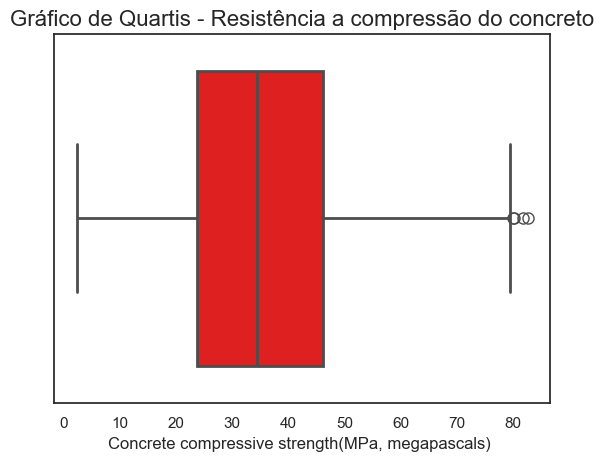

In [23]:
sns.boxplot(x=df['Concrete compressive strength(MPa, megapascals) '], color='red', fliersize=8, linewidth=2)
 
plt.title('Gráfico de Quartis - Resistência a compressão do concreto', fontsize=16)
plt.show()

---------

### <center> Normalizar Dados </center>


Normalização de dados é o processo de transformar os dados de modo que eles tenham uma escala comum, sem distorcer as diferenças nas faixas de valores. Esse processo é importante quando se trabalha com algoritmos de aprendizado de máquina que são sensíveis à escala dos dados, como o K-nearest neighbors (KNN). E existem diferentes técnicas para normalizar dados, sendo as mais comuns:

#### Normalizador Padrão:

Nesse método, os dados são transformados para que tenham média 0 e desvio padrão 1. A fórmula para o Z-score é:

$$
Z_i = \frac{X_i - \mu}{\sigma}
$$

#### Normalizador Pelo Mínimo e Máximo: 

 Ela consiste em ajustar os dados para que fiquem dentro de um intervalo específico, como [0, 1]. A fórmula para essa transformação é:

 $$
X_{\text{normalizado}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

#### Normalizador Pelo Máximo Absoluto:

Os valores de um conjunto de dados são ajustados dividindo-os pelo maior valor absoluto do conjunto. Isso assegura que os dados fiquem no intervalo de [−1,1], independentemente da distribuição dos valores.

$$
X_{\text{normalizado}} = \frac{X}{|X_{\text{max}}|}
$$

E vamos primeiramente calcular a normalização padrão dos dados do datasets

In [24]:
from sklearn.preprocessing import StandardScaler

# Normalizador de X
normalizador_padrao_X = StandardScaler()

normalizador_padrao_X.fit(X_treino)

X_treino_normalizado_padrao = normalizador_padrao_X.transform(X_treino)

X_teste_normalizado_padrao = normalizador_padrao_X.transform(X_teste)

# Nomalização de Y

normalizador_padrao_Y = StandardScaler()

# Remodelando Y_treino para o formato correto (matriz de uma coluna)
normalizador_padrao_Y.fit(Y_treino.reshape(-1, 1))

Y_treino_normalizado_padrao = normalizador_padrao_Y.transform(Y_treino.reshape(-1, 1)).ravel()

# Transformando Y_teste com o mesmo scaler
Y_teste_normalizado_padrao = normalizador_padrao_Y.transform(Y_teste.reshape(-1, 1)).ravel()


-------------

#### RMSE (Root Mean Squared Error)

O **RMSE** (Root Mean Squared Error) é uma métrica comum utilizada para avaliar a precisão de modelos preditivos, especialmente em problemas de regressão. Ele mede a média das diferenças quadráticas entre os valores preditos pelo modelo e os valores reais observados.

A fórmula do RMSE é dada por:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

Onde:
- $y_i$ é o valor real observado.
- $ \hat{y_i} $ é o valor predito pelo modelo.
- $ n $ é o número total de amostras.

#### Interpretação

- **Valor baixo de RMSE**: Indica que o modelo tem uma boa capacidade de prever os valores, ou seja, as previsões estão próximas dos valores reais.
- **Valor alto de RMSE**: Indica que o modelo tem uma grande diferença entre as previsões e os valores reais, sugerindo um desempenho inferior.

#### Características
- **Sensível a outliers**: O RMSE é sensível a grandes erros de previsão, pois os erros são elevados ao quadrado.
- **Unidade de medida**: A unidade do RMSE é a mesma da variável de saída, o que facilita a interpretação.

#### Vantagens
- Fácil de entender e calcular.
- Intuitivo, pois penaliza previsões distantes de forma mais severa devido ao uso de quadrados.

#### Desvantagens
- Pode ser influenciado por outliers, pois erros grandes são amplificados.


-------------

#### Avaliando o desempenho dos Modelos Preditivos
 
Para avaliar a performance do modelo em relação à média do target, calculamos o RMSE percentual. A fórmula utilizada é:
 
$$
\text{RMSE percentual} = \left( \frac{\text{RMSE}}{\text{Média do Target}} \right) \times 100
$$
 

- **Média do target** = 35,81 MPa
 


--------------------

### <center> Modelo Baseline </center>

Primeiramente, será feito um baseline ou também chamado de modelo dummy, para podermos comparar os outros modelos a este, se os próximos modelos forem piores que este, é porquê os outros modelos não são tão bons.

Este modelo é mais simples que modelo linear, segue abaixo sua fórmula:

$$
y = \beta_0 + \epsilon.
$$

É possível afirmar que $y$ na equação acima é o valor esperado de $y$. Além a biblioteca scikit-learn possue uma função própria par calcular esse modelo.

In [25]:
from sklearn.dummy import DummyRegressor

modelo_baseline = DummyRegressor()

modelo_baseline.fit(X_treino, Y_treino)

y_previsto_baseline = modelo_baseline.predict(X_teste)

print(y_previsto_baseline)

[35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409 35.45374409
 35.45374409 35.45374409 35.45374409 35.45374409 35

Vamos computar o RMSE desse modelo:

In [26]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = Y_teste

RMSE_baseline = mean_squared_error(y_verdadeiro, y_previsto_baseline, squared=False)
print(RMSE_baseline)

18.078368524210187


Desempenho em relação a média do target:

Obteve-se um RMSE alto obviamente, pois foi utilizado um modelo muito simples para esse problema, dessa forma, vamos testar outro modelos preditivos, para verificar, qual é o melhor possível, isto é, com menor RMSE. 

--------------

## <center> Modelo Linear Múltiplo </center>

A regressão linear múltipla é um modelo estatístico que avalia a relação entre uma variável dependente contínua e várias variáveis independentes (ou preditores). Esses preditores podem ser contínuos ou categóricos. O modelo é denominado "linear" porque inclui termos aditivos, onde cada preditor é multiplicado por um coeficiente estimado, e geralmente inclui um termo constante (intercepto). [6]
No presente trabalho, estamos trabalhando com 8 atributos, dessa forma não é possível utilizar um modelo linear simples, mas usaremos um modelo linear múltiplo, no qual é possível utilizar essa quantidade de atributos. A fórmula desse modelo é a seguinte:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon.
$$

Faremos primeiro a criação e teste de um modelo sem normalizar os dados:

### Sem normalização dos dados:

In [27]:
from sklearn.linear_model import LinearRegression

modelo_linear_multiplo = LinearRegression()

modelo_linear_multiplo.fit(X_treino, Y_treino)

y_previsto_linear_multiplo = modelo_linear_multiplo.predict(X_teste)

print(y_previsto_linear_multiplo)


[39.91961469 26.07760483 28.38423105 51.58688335 21.6175739  47.77903133
 49.35674159 58.24280461 25.93704192 31.74666237 49.92893338 30.46748268
 21.53815274 59.48918975 23.83017019 24.1196251  25.79883851 71.04636506
 60.41074878 19.97398948 31.81064914 40.57355811 20.60952629 35.02391578
 26.20284777 55.92038355 53.12102426 51.45146812 57.24212089 28.81184299
 72.80893495 44.03555514 27.69414097 37.75935166 32.23648657 38.37175484
 41.52579753 43.11717125 53.12102426 33.23498669 25.56164638 57.27381152
 25.04208787 35.99381966 47.32410199 34.23010292 56.29709886 30.26754537
 70.05973901 40.00555009 24.22166165 17.16112013 18.64240964 52.73099114
 51.43523828 27.37735544 23.36232685 14.60231228 37.28597879 21.78649867
 52.92849121 25.30007281 25.38360861 36.36319192 19.36776642 48.31147285
 61.55012768 32.70815719 47.98254059 23.32304086 20.12251733 23.47387669
 50.9792253  39.03604152 31.57688318 33.34270781 20.7523343  18.12151299
 37.85961845 28.32200376 37.67842428 33.27815583 49

In [28]:
RMSE_linear_multiplo = mean_squared_error(y_verdadeiro, y_previsto_linear_multiplo, squared=False)
print(RMSE_linear_multiplo)

11.22409700924259


Vamos calcular o coeficiente de determinação ou também chamado de $R^2$ para verificar o quão boa é a proporção da variação da variável dependente (target) que é explicada/predita pela variável independente (atributos). E para isso, deve-se saber se o modelo possui ou não intercepto igual a 0, pois se tiver intercepto é possível utilizar a biblioteca scikit-learn para calcular de forma direta essa métrica, se possuir um intercepto igual a zero, será necessário criar uma função que calcula especificamente para este caso. 

Se o intercepto for igual a 0:

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i y_i^2}.
$$

Se o intercepto for diferente de 0, caso onde não é necessário criar uma função, pois o scikit-learn já possui função pronta:

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - E[y])^2},
$$

Além disso, o valor máximo de $R^2$ é 1 e quanto maior for o $R^2$, melhor seu modelo se ajusta aos dados.


In [29]:
print('O intercepto é {}'.format(modelo_linear_multiplo.intercept_))
print('O intercepto é diferente de 0: {}'.format(modelo_linear_multiplo.intercept_ != 0))

O intercepto é -4.71749058793489
O intercepto é diferente de 0: True


Dessa forma, podemos calcular o coeficiente de determinação da seguinte forma:

In [30]:
from sklearn.metrics import r2_score

R2_MODELO_LINEAR_MULTIPLO = r2_score(Y_teste, y_previsto_linear_multiplo)
print("O coeficiente de determinação do modelo foi de {} unidades de y.".format(R2_MODELO_LINEAR_MULTIPLO))


O coeficiente de determinação do modelo foi de 0.5982399464195951 unidades de y.


### Com normalizador padrão dos dados dos atributos:

Com o modelo linear múltiplo foi possível alcançar um RMSE menor que o baseline, mas ainda muito alto. Mas e se fizermos com os dados normalizados pelo normalizador padrão?

In [31]:
modelo_linear_multiplo_normalizado = LinearRegression()

modelo_linear_multiplo_normalizado.fit(X_treino_normalizado_padrao, Y_treino)

y_previsto_linear_multiplo_normalizado = modelo_linear_multiplo_normalizado.predict(X_teste_normalizado_padrao)

print(y_previsto_linear_multiplo_normalizado)

[39.91961469 26.07760483 28.38423105 51.58688335 21.6175739  47.77903133
 49.35674159 58.24280461 25.93704192 31.74666237 49.92893338 30.46748268
 21.53815274 59.48918975 23.83017019 24.1196251  25.79883851 71.04636506
 60.41074878 19.97398948 31.81064914 40.57355811 20.60952629 35.02391578
 26.20284777 55.92038355 53.12102426 51.45146812 57.24212089 28.81184299
 72.80893495 44.03555514 27.69414097 37.75935166 32.23648657 38.37175484
 41.52579753 43.11717125 53.12102426 33.23498669 25.56164638 57.27381152
 25.04208787 35.99381966 47.32410199 34.23010292 56.29709886 30.26754537
 70.05973901 40.00555009 24.22166165 17.16112013 18.64240964 52.73099114
 51.43523828 27.37735544 23.36232685 14.60231228 37.28597879 21.78649867
 52.92849121 25.30007281 25.38360861 36.36319192 19.36776642 48.31147285
 61.55012768 32.70815719 47.98254059 23.32304086 20.12251733 23.47387669
 50.9792253  39.03604152 31.57688318 33.34270781 20.7523343  18.12151299
 37.85961845 28.32200376 37.67842428 33.27815583 49

In [32]:
RMSE_linear_multiplo_normalizado = mean_squared_error(y_verdadeiro, y_previsto_linear_multiplo_normalizado, squared=False)
print(f"O RMSE do modelo foi de {RMSE_linear_multiplo_normalizado} unidades de y.")

O RMSE do modelo foi de 11.224097009242593 unidades de y.


In [33]:
R2_MODELO_LINEAR_MULTIPLO_NORMALIZADO = r2_score(y_verdadeiro, y_previsto_linear_multiplo_normalizado)
print("O coeficiente de determinação do modelo foi de {} unidades de y.".format(R2_MODELO_LINEAR_MULTIPLO_NORMALIZADO))

O coeficiente de determinação do modelo foi de 0.5982399464195949 unidades de y.


Em seguida, usaremos da função 

### Usar Pipeline para aplicar normalização MaxAbsScaler (Pelo Máximo Absoluto)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression

modelo_linear_regression_pipeline_MaxAbsScaler = make_pipeline(
    MaxAbsScaler(),
    LinearRegression(),
)

modelo_linear_regression_pipeline_MaxAbsScaler.fit(X_treino, Y_treino)

y_previsto_linear_regression_pipeline_MaxAbsScaler = modelo_linear_regression_pipeline_MaxAbsScaler.predict(X_teste)

RMSE_pipeline_linear_regression_MaxAbsScaler = mean_squared_error(y_verdadeiro, y_previsto_linear_regression_pipeline_MaxAbsScaler) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pipeline_linear_regression_MaxAbsScaler} unidades de y.")


modelo_linear_MaxAbsScaler = modelo_linear_regression_pipeline_MaxAbsScaler.named_steps['linearregression']

print(f"O modelo tem intercepto? {modelo_linear_MaxAbsScaler.fit_intercept}")
print(f"Valor do intercepto: {modelo_linear_MaxAbsScaler.intercept_}")

if modelo_linear_MaxAbsScaler.intercept_ != 0:
    R2_MODELO_LINEAR_MULTIPLO_MaxAbsScaler = r2_score(Y_teste, y_previsto_linear_regression_pipeline_MaxAbsScaler)
    print(f"O valor de R² do modelo é: {R2_MODELO_LINEAR_MULTIPLO_MaxAbsScaler}")

O RMSE do modelo foi de 11.224097009242591 unidades de y.
O modelo tem intercepto? True
Valor do intercepto: -4.717490587934293
O valor de R² do modelo é: 0.598239946419595


### Usar Pipeline para aplicar normalização MinMaxScaler (Pelo Mínimo e Máximo)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

modelo_linear_regression_pipeline_MinMaxScaler = make_pipeline(
    MinMaxScaler(),
    LinearRegression(),
)

modelo_linear_regression_pipeline_MinMaxScaler.fit(X_treino, Y_treino)

y_previsto_linear_regression_pipeline_MinMaxScaler = modelo_linear_regression_pipeline_MinMaxScaler.predict(X_teste)

RMSE_pipeline_linear_regression_MinMaxScaler = mean_squared_error(y_verdadeiro, y_previsto_linear_regression_pipeline_MinMaxScaler) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pipeline_linear_regression_MinMaxScaler} unidades de y.")

modelo_linear_MinMaxScaler = modelo_linear_regression_pipeline_MinMaxScaler.named_steps['linearregression']

print(f"O modelo tem intercepto? {modelo_linear_MinMaxScaler.fit_intercept}")
print(f"Valor do intercepto: {modelo_linear_MinMaxScaler.intercept_}")

if modelo_linear_MinMaxScaler.intercept_ != 0:
    R2_MODELO_LINEAR_MULTIPLO_MinMaxScaler = r2_score(Y_teste, y_previsto_linear_regression_pipeline_MinMaxScaler)
    print(f"O valor de R² do modelo é: {R2_MODELO_LINEAR_MULTIPLO_MinMaxScaler}")

O RMSE do modelo foi de 11.22409700924259 unidades de y.
O modelo tem intercepto? True
Valor do intercepto: 3.098907596103132
O valor de R² do modelo é: 0.5982399464195951


##### Conclusão: 

As normalizações não fizeram muita diferença para este modelo regressão linear múltipla, mas no entanto este modelo foi bem melhor do modelo anterior, o baseline, que alcançou um RMSE de aproximadamente 18, enquanto o modelo linear múltiplo foi de 11, ou seja, foi possível alcançar uma melhora significativa no modelo.

---------------

## <center> K-vizinhos mais próximos </center>


Primeiramente, segundo  [5], a técnica K-nearest neighbors (KNN) é um algoritmo de aprendizado supervisionado amplamente utilizado para tarefas de classificação. Nesse método, a classificação de uma nova amostra é definida com base nas classes das amostras mais próximas, conhecidas como vizinhos. O principal parâmetro do KNN é o valor de k, que indica o número de vizinhos a serem considerados na decisão. Por exemplo, se k=3, a classe da nova amostra será determinada pela classe mais frequente entre os três vizinhos mais próximos. A seguir, apresenta-se uma ilustração desse processo conforme descrito por Pedroso (2009) [5]

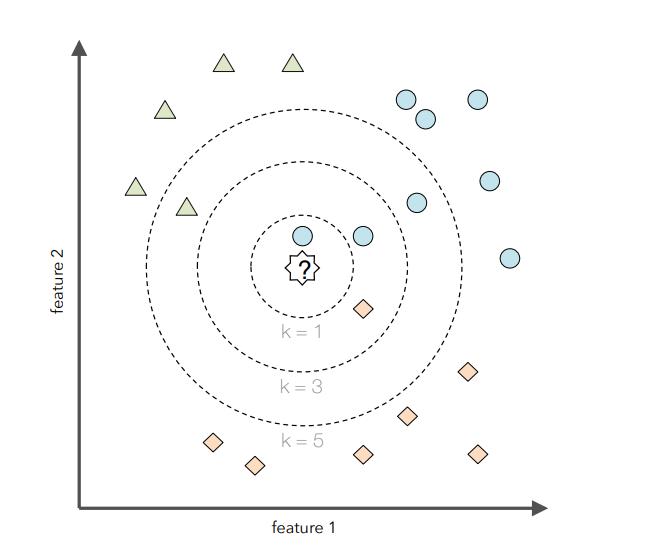

Primeiramente, foi feito o modelo K-NN sem normalizar os dados, para verificar a pior hipótese de resultado.

#### Sem normalização dos dados:

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Criar uma instância do modelo
NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

# Ajustar o modelo aos dados
modelo_knn.fit(X_treino, Y_treino)

y_previsto_knn = modelo_knn.predict(X_teste)
print(y_previsto_knn)

[55.61887979 20.05455859 28.81756872 43.10866609 25.53819104 32.37319645
 47.67266889 41.34718624 15.73614057 20.29587519 33.16051238 28.10534001
 17.26654747 62.96524657 23.77543073 18.74156646 20.52110401 45.88692605
 79.29663476 18.10632924 36.52154372 62.80965482 13.23081461 39.38516737
 12.85826775 55.69816953 33.16051238 37.58517536 45.73294308 29.69573132
 64.16493481 35.66429523 39.39275161 35.5234123  29.82144578 24.33528525
 52.24619303 45.3013311  33.16051238 37.51806637 16.34908474 59.56383164
 39.18751759 33.25342748 39.16913156 28.33378639 56.59678659 25.60024388
 46.40931904 52.77777902 22.29535559 18.2692754  34.32349423 56.29801365
 37.79017956 47.58464579 34.53148616 13.12256688 40.84892492 22.04484597
 41.56620979 20.73920825 28.84537759 19.16950123 20.18326077 52.93796728
 54.03193587 42.66707313 39.31185309 24.16843205 22.74282551 20.20854156
 32.24219601 59.89363099 33.88314889 35.59764588 20.2361206  21.91545431
 30.91357576 30.86002646 35.52157369 40.40099535 33

In [37]:
RMSE_knn = mean_squared_error(y_verdadeiro, y_previsto_knn, squared=False)

print(f"O RMSE do modelo knn foi de {RMSE_knn} unidades de y.")

O RMSE do modelo knn foi de 11.04203601818492 unidades de y.


### Com normalização padrão dos dados dos atributos:

Vamos testar com os dados normalizados pela normalização padrão.

In [38]:
modelo_knn_normalizado = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

# Ajustar o modelo aos dados
modelo_knn_normalizado.fit(X_treino_normalizado_padrao, Y_treino)

y_previsto_knn_normalizado = modelo_knn_normalizado.predict(X_teste_normalizado_padrao)
print(y_previsto_knn_normalizado)

[55.61887979 24.32471328 28.81756872 43.10866609 30.95977065 36.08257733
 47.67266889 46.11560226 24.26495869 25.60024388 32.66802953 28.10534001
 24.81630967 62.96524657 23.54790365 31.55363931 20.52110401 46.11537243
 79.29663476 12.57052643 37.86832017 62.80965482 13.23081461 39.38516737
 15.46954319 55.69816953 32.66802953 64.72570863 45.73294308 29.69573132
 64.16493481 38.99515378 35.66429523 37.64515977 36.26276039 24.33528525
 53.48954808 47.12775303 32.66802953 33.77076431 16.34908474 59.56383164
 30.64261169 31.9572126  42.45103732 24.02754912 56.59678659 25.60024388
 50.78565303 48.30330961 26.69191421 18.2692754  33.67492714 56.29801365
 37.79017956 47.61774064 26.28512337 15.41599388 39.4561834  22.04484597
 41.56620979 34.74982023 28.84537759 19.16950123 20.18326077 58.85596961
 54.03193587 41.21687528 45.59274963 24.16843205 25.35433077 20.20854156
 32.24219601 56.45636331 33.88314889 35.72864632 20.21543632 15.02483117
 30.91357576 30.86002646 37.19677055 40.40099535 32

In [39]:
RMSE_knn_normalizado = mean_squared_error(y_verdadeiro, y_previsto_knn_normalizado, squared=False)

print(f"O RMSE do modelo knn com dados normalizado pela normalização padrão foi de {RMSE_knn_normalizado} unidades de y.")

O RMSE do modelo knn com dados normalizado pela normalização padrão foi de 10.409808260245157 unidades de y.


### Usar Pipeline para aplicar normalização MaxAbsScaler (Pelo Máximo Absoluto)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsRegressor

modelo_knn_pipeline_MaxAbsScaler = make_pipeline(
    MaxAbsScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

modelo_knn_pipeline_MaxAbsScaler.fit(X_treino, Y_treino)

y_previsto_knn_pipeline_MaxAbsScaler = modelo_knn_pipeline_MaxAbsScaler.predict(X_teste)

RMSE_pipeline_knn_MaxAbsScaler = mean_squared_error(y_verdadeiro, y_previsto_knn_pipeline_MaxAbsScaler) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pipeline_knn_MaxAbsScaler} unidades de y.")

O RMSE do modelo foi de 10.067052010903774 unidades de y.


### Usar Pipeline para aplicar normalização MinMaxScaler (Pelo Mínimo e Máximo)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

modelo_knn_pipeline_MinMaxScaler = make_pipeline(
    MinMaxScaler(),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

modelo_knn_pipeline_MinMaxScaler.fit(X_treino, Y_treino)

y_previsto_knn_pipeline_MinMaxScaler = modelo_knn_pipeline_MinMaxScaler.predict(X_teste)

RMSE_pipeline_knn_MinMaxScaler = mean_squared_error(y_verdadeiro, y_previsto_knn_pipeline_MinMaxScaler) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pipeline_knn_MinMaxScaler } unidades de y.")

O RMSE do modelo foi de 10.981967636066956 unidades de y.


#### Conclusão:

Os resultado do RMSE quando foi normalizado e quando não foi normalizado, diferem entre si, o que demostra que há uma diferença para este modelo se realiza ou não a normalização, mas não é diferença substancial. Portanto, é importante sempre realizar a normalização para verificar o quando isso modifica os resultados, e se é benéfico para o caso trabalhado. Além disso, o modelo k-NN foi melhor que o baseline, mas não encontrou tanta diferença em performance do modelo linear múltiplo. Mas o k-NN usando o normalizador pelo máximo absoluto foi o melhor modelo testado até agora.

--------------

## <center> Árvore de Decisão com Otimização de Hiperparâmetros </center>

Segundo o IBM, "uma árvore de regressão é um tipo de árvore de decisão. Ela usa a soma de quadrados e análise de regressão para prever os valores do campo de destino. As predições são baseadas em combinações de valores nos campos de entrada". Nas células a seguir, utilizamos esse modelo com a otimização de hiperparâmetros. O RMSE foi utilizado como métrica de performance.

Primeiramente, importamos o módulo "DecisionTreeRegressor" para realizar uma regressão com árvore de decisão

In [42]:
from sklearn.tree import DecisionTreeRegressor

Posteriormente, criamos uma instância utilizando um dicionário com alguns dos parâmetros apresentados na aba "DecisionTreeRegressor" do "Scikit Learn". De forma simplificada, essa função combina diversos hiperparâmetros e permite achar a melhor configuração.

In [43]:
def cria_instancia_modelo_arvore_de_decisao(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do Optuna.

    Returns:
      Uma instância do DecisionTreeRegressor.
    """
    parametros_arvore_de_decisao = {
        "criterion": trial.suggest_categorical(
            "criterio", ["squared_error", "friedman_mse", "absolute_error", "poisson"]
        ),
        "splitter": trial.suggest_categorical(
            "splitter", ["best", "random"]
        ),
        # Profundidade entre 2 e 32 é razoável; limitar previne overfitting.
        "max_depth": trial.suggest_int("profundidade_max", 2, 32),
        
        # min_samples_split define o mínimo de exemplos para dividir um nó.
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20
        ),
        
        # min_samples_leaf define o mínimo de exemplos em uma folha.
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20
        ),
        
        # max_features pode ser um valor numérico ou uma razão ('sqrt', 'log2').
        "max_features": trial.suggest_categorical(
            "num_max_atributos", ["sqrt", "log2", None]
        ),
        
        # Fixa a aleatoriedade para reprodutibilidade.
        "random_state": SEMENTE_ALEATORIA,
    }

    modelo_arvore_de_decisao = DecisionTreeRegressor(**parametros_arvore_de_decisao)

    return modelo_arvore_de_decisao


Definição da função objetivo. Podemos defini-la da seguinte forma: "[...] recebe um "trial" e dados explicitamente, usa as funções definidas previamente para criar o de modelo, avalia usando validação cruzada e retorna o desempenho". Referência: https://medium.com/@walter_sperat/using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

In [44]:
from sklearn.model_selection import cross_val_score

def funcao_objetivo_arvore_de_decisao(trial, X_treino, Y_treino, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo_arvore_de_decisao = cria_instancia_modelo_arvore_de_decisao(trial)

    metricas_arvore_de_decisao = cross_val_score(
        modelo_arvore_de_decisao,
        X_treino,
        Y_treino,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    # releia sobre scores no sklearn para relembrar porque tem um negativo abaixo
    return -metricas_arvore_de_decisao.mean()

Criação de um estudo para gerenciar experimentos com o objetivo de otimizar os hiperparâmetros

In [45]:
from optuna import create_study

NOME_DO_ESTUDO_ARVORE_DE_DECISAO = "arvore_aleatoria_Concrete_compressive_strength_10_final"

objeto_de_estudo_arvore_de_decisao = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO_ARVORE_DE_DECISAO,
    storage=f"sqlite:///{NOME_DO_ESTUDO_ARVORE_DE_DECISAO}.db",
    load_if_exists=True,
)

[I 2024-11-11 16:16:30,934] Using an existing study with name 'arvore_aleatoria_Concrete_compressive_strength_10' instead of creating a new one.


Nessa célula, definimos a função "funcao_objetivo_parcial_arvore_de_decisao", a qual utiliza um número de "folds" igual a 10

In [46]:
NUM_FOLDS_ARVORE_DE_DECISAO = 10

def funcao_objetivo_parcial_arvore_de_decisao(trial):
    return funcao_objetivo_arvore_de_decisao(trial, X_treino, Y_treino, NUM_FOLDS_ARVORE_DE_DECISAO)

Número de tentativas e execução da otimização de parâmetros

In [47]:
NUM_TENTATIVAS_ARVORE_DE_DECISAO = 100

objeto_de_estudo_arvore_de_decisao.optimize(funcao_objetivo_parcial_arvore_de_decisao, n_trials=NUM_TENTATIVAS_ARVORE_DE_DECISAO)

[I 2024-11-11 16:16:31,355] Trial 123 finished with value: 6.217651040378903 and parameters: {'criterio': 'squared_error', 'splitter': 'best', 'profundidade_max': 28, 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': None}. Best is trial 110 with value: 6.217651040378903.
[I 2024-11-11 16:16:31,648] Trial 124 finished with value: 6.217651040378903 and parameters: {'criterio': 'squared_error', 'splitter': 'best', 'profundidade_max': 28, 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': None}. Best is trial 110 with value: 6.217651040378903.
[I 2024-11-11 16:16:32,000] Trial 125 finished with value: 6.217651040378903 and parameters: {'criterio': 'squared_error', 'splitter': 'best', 'profundidade_max': 28, 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': None}. Best is trial 110 with value: 6.217651040378903.
[I 2024-11-11 16:16:32,275] Trial 126 finished with value: 6.217651040378903 and parameters: {'criterio': 'squared_err

Visualização por meio de um DataFrame

In [48]:
df_arvore_de_decisao = objeto_de_estudo_arvore_de_decisao.trials_dataframe()

df_arvore_de_decisao

,number,value,datetime_start,datetime_complete,duration,params_criterio,params_min_exemplos_folha,params_min_exemplos_split,params_num_max_atributos,params_profundidade_max,params_splitter,state
0,0,7.079599,2024-11-11 03:33:06.847851,2024-11-11 03:33:07.199133,0 days 00:00:00.351282,poisson,4,19,None,15,best,COMPLETE
1,1,14.086818,2024-11-11 03:33:07.263744,2024-11-11 03:33:07.403256,0 days 00:00:00.139512,friedman_mse,17,8,sqrt,29,random,COMPLETE
2,2,8.011509,2024-11-11 03:33:07.445391,2024-11-11 03:33:07.690313,0 days 00:00:00.244922,poisson,20,7,None,19,best,COMPLETE
3,3,12.694301,2024-11-11 03:33:07.730379,2024-11-11 03:33:07.948019,0 days 00:00:00.217640,squared_error,18,15,log2,22,random,COMPLETE
4,4,6.756855,2024-11-11 03:33:08.028524,2024-11-11 03:33:08.745292,0 days 00:00:00.716768,absolute_error,3,10,None,8,best,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
218,218,6.217651,2024-11-11 16:16:58.925841,2024-11-11 16:16:59.190580,0 days 00:00:00.264739,squared_error,1,2,None,27,best,COMPLETE
219,219,6.281072,2024-11-11 16:16:59.236863,2024-11-11 16:16:59.483139,0 days 00:00:00.246276,squared_error,1,3,None,28,best,COMPLETE
220,220,6.217651,2024-11-11 16:16:59.513324,2024-11-11 16:16:59.762092,0 days 00:00:00.248768,squared_error,1,2,None,27,best,COMPLETE
221,221,6.421235,2024-11-11 16:16:59.787895,2024-11-11 16:17:00.020133,0 days 00:00:00.232238,squared_error,2,3,None,26,best,COMPLETE


Impressão do número e dos parâmetros do melhor "trial".

In [49]:
melhor_trial_arvore_de_decisao = objeto_de_estudo_arvore_de_decisao.best_trial

print(f"Número do melhor trial: {melhor_trial_arvore_de_decisao.number}")
print(f"Parâmetros do melhor trial: {melhor_trial_arvore_de_decisao.params}")

Número do melhor trial: 110
Parâmetros do melhor trial: {'criterio': 'squared_error', 'splitter': 'best', 'profundidade_max': 27, 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': None}


Cálculo de RMSE:

In [50]:
from sklearn.metrics import mean_squared_error

modelo = cria_instancia_modelo_arvore_de_decisao(melhor_trial_arvore_de_decisao)
modelo.fit(X_treino, Y_treino)

y_verdadeiro = Y_teste
y_previsao = modelo.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

from sklearn.metrics import mean_squared_error

print(f'O RMSE do modelo foi {RMSE}')

O RMSE do modelo foi 6.4282022618139605


In [51]:
print(df[TARGET].max())
print(df[TARGET].min())

Concrete compressive strength(MPa, megapascals)     82.599225
dtype: float64
Concrete compressive strength(MPa, megapascals)     2.331808
dtype: float64


### Conclusão

Considerando a grande amplitude dos dados (estão numa escala entre 2 e 83), um RMSE de aproximadamente 6.14 indica um modelo com uma boa performance para os dados apresentados. Utilizando o RMSE relativo, temos que $$\text{RMSE percentual} \approx \left( \frac{\text{6,14}}{\text{35,81}} \right) \times 100 \approx 17,146$$. Isso significa que o erro médio do modelo é cerca de **17,146%** da média do target, o que representa um desempenho razoável.



**Definição:**

A Floresta Aleatória (Random Forest) é um algoritmo de aprendizado de máquina muito usado para resolver problemas de previsão e classificação. Ele funciona criando várias árvores de decisão que, juntas, formam uma "floresta". Cada árvore de decisão é um modelo simples que toma decisões dividindo os dados em diferentes grupos, com base nas características dos dados. A Floresta Aleatória, ao invés de confiar em uma única árvore, cria várias delas e combina os resultados de todas para fazer a previsão final. No caso de regressão (como o seu modelo de previsão da resistência do concreto), o resultado final é a média das previsões feitas por todas as árvores.

Uma das principais vantagens da Floresta Aleatória é que ela ajuda a evitar o problema do overfitting (ajuste excessivo aos dados de treinamento). Como cada árvore é treinada com uma amostra diferente dos dados e com um subconjunto aleatório das características, o modelo fica menos propenso a se ajustar demais aos dados específicos e mais capaz de generalizar bem para novos dados. Além disso, a Floresta Aleatória pode lidar com dados complexos e de alta dimensionalidade, o que a torna muito eficaz em várias situações, como no seu caso, em que se tenta prever a resistência do concreto com várias variáveis de entrada.

**Utilização nesse projeto:**

Neste projeto, a Floresta Aleatória foi aplicada para prever a resistência à compressão do concreto com base em uma série de variáveis de entrada, como os componentes do concreto (cimento, escória de alto-forno, cinzas volantes, água, superplastificante, agregado graúdo e agregado miúdo) e a idade do concreto. O objetivo é construir um modelo preditivo que seja capaz de estimar a resistência do concreto (em megapascais, MPa) a partir dessas variáveis.

Para isso, foi utilizado o RandomForestRegressor, que é a versão da Floresta Aleatória voltada para problemas de regressão. Este modelo foi configurado e treinado usando os dados disponíveis. Os principais hiperparâmetros do modelo, como o número de árvores (n_estimators), a profundidade das árvores, o número mínimo de amostras para dividir um nó e o número mínimo de amostras por folha, foram otimizados utilizando Optuna, uma ferramenta de otimização de hiperparâmetros.

A escolha do algoritmo foi motivada pela sua capacidade de lidar com grandes volumes de dados e sua robustez, o que é crucial quando trabalhamos com dados de componentes do concreto, onde as relações podem ser não-lineares e complexas. Ao usar a Floresta Aleatória, buscamos não apenas melhorar a precisão da previsão da resistência do concreto, mas também garantir que o modelo fosse capaz de generalizar bem para novos dados, evitando o overfitting e garantindo previsões consistentes.



**Uso do Optuna para otimizar hiperparâmetros:**

Nesse código definimos duas funções principais para otimizar um modelo de RandomForestRegressor utilizando a biblioteca Optuna. A primeira função, chamada cria_instancia_modelo, tem o objetivo de criar uma instância do modelo RandomForestRegressor com hiperparâmetros ajustados dinamicamente. Ela recebe um objeto trial do Optuna e, com ele, sugere valores para diversos parâmetros do modelo, como o número de árvores `(n_estimators)`, o critério de divisão das árvores `(criterion)`, o número mínimo de amostras para dividir um nó `(min_samples_split)`, o número mínimo de amostras para um nó folha `(min_samples_leaf)`, a proporção máxima de atributos a serem usados em cada divisão `(max_features)`, entre outros. Esses valores são sugeridos automat]icamente pelo Optuna dentro de intervalos definidos, permitindo a busca pelo conjunto ideal de parâmetros. Ao final, a função retorna uma instância do modelo configurado com os parâmetros definidos.

A segunda função, chamada funcao_objetivo, é utilizada no processo de otimização do Optuna. Esta função tem como principal tarefa avaliar a performance do modelo criado com os hiperparâmetros sugeridos pelo Optuna. Ela utiliza o método de validação cruzada `(cross-validation)` para calcular a métrica de desempenho do modelo em diferentes subconjuntos dos dados. A métrica utilizada é o Root Mean Squared Error `(RMSE)`, que é retornada de forma negativa, já que o sklearn busca maximizar o valor da métrica e, neste caso, desejamos minimizá-la. O Optuna vai iterativamente testar diferentes combinações de parâmetros e tentar encontrar a configuração que minimize esse erro médio, permitindo assim otimizar o modelo para melhor performance.

----------------------

## <center> Floresta Aleatória com Otimização de Hiperparâmetros </center>

In [52]:
from sklearn.ensemble import RandomForestRegressor

def cria_instancia_modelo(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.

    """
    parametros = {
        "n_estimators": trial.suggest_int("num_arvores", 10, 100),
        "criterion": trial.suggest_categorical(
            "critério", ["squared_error", "friedman_mse", "poisson"]
        ),
        "min_samples_split": trial.suggest_int(
            "min_exemplos_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_exemplos_folha", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("num_max_atributos", 0, 1),
        "n_jobs": -1,
        "bootstrap": True,
        "random_state": SEMENTE_ALEATORIA,
    }

    model = RandomForestRegressor(**parametros)

    return model


from sklearn.model_selection import cross_val_score

def funcao_objetivo(trial, X, y, num_folds):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451

    """
    modelo = cria_instancia_modelo(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,
    )

    return -metricas.mean()

**Criação do arquivo de estudo**

Usando a biblioteca Optuna, criamos um arquivo de estudo que armazenará todas as tentativas de otimização realizadas durante o processo de busca pelos melhores hiperparâmetros. Esse arquivo permitirá que o Optuna registre e acesse as tentativas anteriores, otimizando a busca.

In [53]:
from optuna import create_study

NOME_DO_ESTUDO = "arvore_aleatoria_concreto_final"

objeto_de_estudo = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,
)

[I 2024-11-11 16:17:01,331] A new study created in RDB with name: arvore_aleatoria_concreto


Com isso, criamos uma instância de estudo com o nome especificado e configuramos o Optuna para armazenar as tentativas de otimização em um banco de dados. O parâmetro `direction="minimize"` indica que queremos minimizar a função objetivo, ou seja, reduzir o erro do modelo.

**Função do optuna**

O Optuna requer uma função objetivo que recebe um único parâmetro `(trial)` para sugerir os valores dos hiperparâmetros. Com a função objetivo previamente definida, podemos configurar o número de tentativas que o Optuna deve realizar na busca pelos melhores hiperparâmetros.

In [54]:
NUM_FOLDS = 10

def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, Y_treino, NUM_FOLDS)

Aqui, a função optimize é chamada para iniciar o processo de otimização. O parâmetro `n_trials` define quantas tentativas o Optuna deve fazer. Cada "tentativa" envolve a escolha de um conjunto de hiperparâmetros, a avaliação do desempenho do modelo com esses parâmetros e o registro dos resultados.

In [55]:
NUM_TENTATIVAS = 100

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

[I 2024-11-11 16:17:02,950] Trial 0 finished with value: 6.568653084058068 and parameters: {'num_arvores': 64, 'critério': 'friedman_mse', 'min_exemplos_split': 4, 'min_exemplos_folha': 1, 'num_max_atributos': 0.1376201306343775}. Best is trial 0 with value: 6.568653084058068.
[I 2024-11-11 16:17:04,125] Trial 1 finished with value: 4.827002304621276 and parameters: {'num_arvores': 33, 'critério': 'squared_error', 'min_exemplos_split': 3, 'min_exemplos_folha': 1, 'num_max_atributos': 0.6431579792579657}. Best is trial 1 with value: 4.827002304621276.
[I 2024-11-11 16:17:05,597] Trial 2 finished with value: 5.1072175336563435 and parameters: {'num_arvores': 57, 'critério': 'squared_error', 'min_exemplos_split': 8, 'min_exemplos_folha': 1, 'num_max_atributos': 0.8378676774194094}. Best is trial 1 with value: 4.827002304621276.
[I 2024-11-11 16:17:07,181] Trial 3 finished with value: 5.016899934115189 and parameters: {'num_arvores': 52, 'critério': 'friedman_mse', 'min_exemplos_split': 3,

Podemos obter o número da melhor tentativa e seus parâmetros por meio do método `best_trial`:

In [56]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 99
Parâmetros do melhor trial: {'num_arvores': 86, 'critério': 'squared_error', 'min_exemplos_split': 2, 'min_exemplos_folha': 1, 'num_max_atributos': 0.5413330727768411}


**Utilizando o modelo**

Com os melhores parâmetros encontrados, podemos instanciar o modelo e treinar com os dados de treinamento. Após o treinamento, fazemos a previsão para os dados de teste e calculamos o Root Mean Squared Error (RMSE) para avaliar o desempenho do modelo.

In [57]:
from sklearn.metrics import mean_squared_error

modelo = cria_instancia_modelo(melhor_trial)
modelo.fit(X_treino, Y_treino)

y_verdadeiro = Y_teste
y_previsao = modelo.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao) ** (1/2)

print(RMSE)

4.896305612048668


#### Avaliando o desempenho da floresta aleatória
 
Com os seguintes valores:
 
- **RMSE** = 5,12
- **Média do target** = 35,81 MPa
 
Substituindo na fórmula:
 
$$
\text{RMSE percentual} = \left( \frac{5,12}{35,81} \right) \times 100 \approx 14,3\%
$$
 
Isso significa que o erro médio do modelo é cerca de **14,3%** da média do target.
 
##### Conclusão
 
Um RMSE de 14,3% em relação à média do target indica um desempenho razoável do modelo da floresta aleatória. Embora o valor não seja extremamente baixo, ele sugere que o modelo está fazendo previsões com uma precisão razoável dentro do intervalo dos dados.
 
 

----------------------

## <center> Seleção de Atributos </center>


A seleção de atributos (ou feature selection) é uma técnica utilizada em aprendizado de máquina para escolher um subconjunto de atributos (ou features) mais relevantes para o modelo, com o objetivo de melhorar a performance, reduzir a complexidade e evitar o sobreajuste (overfitting). Essa técnica é essencial quando se trabalha com datasets grandes, onde nem todos os atributos são igualmente importantes para a tarefa preditiva.

Nessa etapa vamos verificar se o modelo está ou não identificando padrões espúrios, resultando em sobreajustes do modelo aos targets. Dessa forma, vamos implementar alguns métodos para selecionar atributos e verificar se ao utilizar desse método, melhora ou não as métricas. 

## <center>Seleção de atributos pelo limiar da Variância</center>

É uma técnica simples e eficaz para eliminar atributos que não carregam informação significativa para o modelo, com base na variância dos dados. A ideia central dessa técnica é que atributos com pouca ou nenhuma variabilidade não contribuem para a distinção entre as amostras e, portanto, podem ser descartados. Neste caso, descartaremos, se houver uma variância igual 0. 

In [58]:
print(np.var(X_treino, axis=0))

[10926.71766983  7439.7770265   4027.55266729   442.43165179
    34.82503014  6008.9636168   6346.15255733  4036.77617769]


In [59]:
print(np.var(X_teste, axis=0))

[10770.74958349  7408.6911961   4518.19441951   570.45844238
    41.39457577  5752.27639506  6964.8053737   3533.49929305]


Todas as oitos colunas dos atributos possuem variância diferente de zero. Então ao aplicar VarianceThreshold espera-se que isso não interefirá em nada.

In [60]:
from sklearn.feature_selection import VarianceThreshold

seletor_limiar_variancia = VarianceThreshold()

seletor_limiar_variancia.fit(X_treino)

X_treino_limiar_variancia = seletor_limiar_variancia.transform(X_treino)

print(X_treino_limiar_variancia)
print('-=-'*20)
print(X_treino)

[[ 233.81    0.     94.58 ...  947.04  852.16  100.  ]
 [ 310.      0.      0.   ... 1012.    830.      3.  ]
 [ 122.6   183.9     0.   ...  958.2   800.1     7.  ]
 ...
 [ 184.     86.    190.   ...  923.    623.     28.  ]
 [ 525.      0.      0.   ... 1125.    613.      3.  ]
 [ 425.    106.3     0.   ...  852.1   887.1     7.  ]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
[[ 233.81    0.     94.58 ...  947.04  852.16  100.  ]
 [ 310.      0.      0.   ... 1012.    830.      3.  ]
 [ 122.6   183.9     0.   ...  958.2   800.1     7.  ]
 ...
 [ 184.     86.    190.   ...  923.    623.     28.  ]
 [ 525.      0.      0.   ... 1125.    613.      3.  ]
 [ 425.    106.3     0.   ...  852.1   887.1     7.  ]]


Dessa forma, a seleção de atributo pelo limiar da variância pouco nos ajudou, pois os dados que possuimos possuem alta variância, e não é possível selecionar os dados com esse método.

## <center>Seleção de atributos por remoção recursiva de atributos (RFE)</center>


####  1. Modelo Linear Múltiplo usando RFE:

Usando o método RFE de seleção de atributos para o modelo de regressão linear múltipla foi visivelmente não muito útil para aprimorar o modelo, visto que o RMSE se manteve quase o mesmo, e nunca foi inferior ao RMSE do modelo linear múltiplo usando todas as colunas de target, isto é, as 8 colunas.

In [61]:
from sklearn.feature_selection import RFE
modelo_linear = LinearRegression()

for NUM_ATRIBUTOS_DESEJADOS in range(1, 9):
    seletor_remocao_recursiva_de_atributos = RFE(modelo_linear, n_features_to_select=NUM_ATRIBUTOS_DESEJADOS)
    seletor_remocao_recursiva_de_atributos.fit(X_treino, Y_treino)

    X_treino_remocao_recusiva_de_atributos = seletor_remocao_recursiva_de_atributos.transform(X_treino)
    X_teste_remocao_recusiva_de_atributos = seletor_remocao_recursiva_de_atributos.transform(X_teste)

    
    modelo_linear_regression_pipeline_StandardScaler_RFE = make_pipeline(
        StandardScaler(),
        LinearRegression()
    )
    modelo_linear_regression_pipeline_StandardScaler_RFE.fit(X_treino_remocao_recusiva_de_atributos, Y_treino)

    
    y_previsto_linear_regression_pipeline_StandardScaler_RFE = modelo_linear_regression_pipeline_StandardScaler_RFE.predict(X_teste_remocao_recusiva_de_atributos)

    
    RMSE_pipeline_linear_regression_StandardScaler_RFE = mean_squared_error(Y_teste, y_previsto_linear_regression_pipeline_StandardScaler_RFE) ** 0.5

    # Imprimindo os resultados para o número atual de atributos selecionados
    print(f"Número de atributos selecionados: {NUM_ATRIBUTOS_DESEJADOS}")
    print(f"Colunas selecionadas: {seletor_remocao_recursiva_de_atributos.support_}")
    print(f"Ordenação (rank) dos atributos: {seletor_remocao_recursiva_de_atributos.ranking_}")
    print(f"O RMSE do modelo com {NUM_ATRIBUTOS_DESEJADOS} atributos foi de {RMSE_pipeline_linear_regression_StandardScaler_RFE} unidades de y.")
    print("-=-"*20)

Número de atributos selecionados: 1
Colunas selecionadas: [False False False False  True False False False]
Ordenação (rank) dos atributos: [4 5 6 2 1 7 8 3]
O RMSE do modelo com 1 atributos foi de 16.581191582119107 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 2
Colunas selecionadas: [False False False  True  True False False False]
Ordenação (rank) dos atributos: [3 4 5 1 1 6 7 2]
O RMSE do modelo com 2 atributos foi de 16.452734046312564 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 3
Colunas selecionadas: [False False False  True  True False False  True]
Ordenação (rank) dos atributos: [2 3 4 1 1 5 6 1]
O RMSE do modelo com 3 atributos foi de 14.916202004427037 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 4
Colunas selecionadas: [ True False False  True  True False False  True]
Ordenação (ra

####  2. Árvores de Decisão usando RFE:

A seleção RFE também pode ser aplicado à árvore de decisão, de forma que as variáveis mais relevantes para realizar previsões são selecionadas, enquanto as menos relevantes não são incluídas no processo. Isso reduz a complexidade e pode aumentar a performance.[9]

In [62]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

NUM_ATRIBUTOS_DESEJADOS = 5

modelo = DecisionTreeRegressor()

seletor = RFE(modelo, n_features_to_select=NUM_ATRIBUTOS_DESEJADOS)
seletor.fit(X_treino, Y_treino)

X_treino_modificado = seletor.transform(X_treino)
X_teste_modificado = seletor.transform(X_teste)

print(f"Número de atributos selecionados: {seletor.n_features_}")
print(f"Colunas selecionadas: {seletor.support_}")
print(f"Ordenação (rank) dos atributos {seletor.ranking_}")

Número de atributos selecionados: 5
Colunas selecionadas: [ True  True False  True False  True False  True]
Ordenação (rank) dos atributos [1 1 4 1 3 1 2 1]


Implementação da árvore de decisão com a seleção RFE

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
modelo_arvore_decisao = DecisionTreeRegressor()

for NUM_ATRIBUTOS_DESEJADOS in range(1, 9):
    seletor_remocao_recursiva_de_atributos = RFE(modelo_arvore_decisao, n_features_to_select=NUM_ATRIBUTOS_DESEJADOS)
    seletor_remocao_recursiva_de_atributos.fit(X_treino, Y_treino)

    X_treino_remocao_recursiva_de_atributos = seletor_remocao_recursiva_de_atributos.transform(X_treino)
    X_teste_remocao_recursiva_de_atributos = seletor_remocao_recursiva_de_atributos.transform(X_teste)
    modelo_arvore_decisao_pipeline = make_pipeline(
        StandardScaler(),
        DecisionTreeRegressor()
    )
    modelo_arvore_decisao_pipeline.fit(X_treino_remocao_recursiva_de_atributos, Y_treino)

    y_previsto_arvore_decisao = modelo_arvore_decisao_pipeline.predict(X_teste_remocao_recursiva_de_atributos)
    
    RMSE_arvore_decisao = mean_squared_error(Y_teste, y_previsto_arvore_decisao) ** 0.5

    print(f"Número de atributos selecionados: {NUM_ATRIBUTOS_DESEJADOS}")
    print(f"Colunas selecionadas: {seletor_remocao_recursiva_de_atributos.support_}")
    print(f"Ordenação (rank) dos atributos: {seletor_remocao_recursiva_de_atributos.ranking_}")
    print(f"O RMSE do modelo com {NUM_ATRIBUTOS_DESEJADOS} atributos foi de {RMSE_arvore_decisao} unidades de y.")
    print("-=-"*20)


Número de atributos selecionados: 1
Colunas selecionadas: [ True False False False False False False False]
Ordenação (rank) dos atributos: [1 4 8 3 7 6 5 2]
O RMSE do modelo com 1 atributos foi de 15.72725691750373 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 2
Colunas selecionadas: [ True False False False False False False  True]
Ordenação (rank) dos atributos: [1 3 7 2 6 4 5 1]
O RMSE do modelo com 2 atributos foi de 12.274593386686432 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 3
Colunas selecionadas: [ True False False  True False False False  True]
Ordenação (rank) dos atributos: [1 2 6 1 5 4 3 1]
O RMSE do modelo com 3 atributos foi de 8.824397009724708 unidades de y.
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Número de atributos selecionados: 4
Colunas selecionadas: [ True  True False  True False False False  True]
Ordenação (rank

### Conclusão 

À medida que mais atributos são selecionados, o RMSE diminui, alcançando o valor mais baixo de 6.03 quando 4 atributos são escolhidos, o que sugere que esse conjunto de atributos proporciona o melhor equilíbrio entre precisão e complexidade do modelo. Com 5 atributos, por exemplo, o RMSE aumenta ligeiramente para 7.58, indicando que a inclusão de mais atributos não melhora substancialmente a performance do modelo e pode até introduzir algum ruído. 

## <center>Seleção de atributos pelo fator de inflação de variância (VIF)</center>

O VIF (Variance Inflation Factor, ou Fator de Inflação de Variância) é uma medida estatística utilizada para detectar multicolinearidade em modelos de regressão linear. Ele indica o quanto a variância de um coeficiente de regressão está inflacionada devido à correlação entre os preditores (variáveis independentes) do modelo.

Como o VIF é calculado?

O VIF para uma variável $X_i$ é calculado a partir da regressão de $X_i$ sobre todas as outras variáveis preditoras no modelo ​sobre todas as outras variáveis preditoras no modelo. A fórmula do VIF é:

$$
VIF(X_i) = \frac{1}{1 - R_i^2}
$$

Onde, $R_i^2$ é o coeficiente de determinação da regressão de $X_i$  sobre as outras variáveis.

In [64]:
from sklearn.linear_model import LinearRegression


def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.

    """
    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)

        else:
            break

    return df

Agora, precisamos retirar a coluna que o VIF considerou menos importante, tanto do X_treino como do X_teste:

In [65]:
LIMIAR_VIF = 5
X_treino_modificado_VIF = pd.DataFrame(X_treino)
X_teste_modificado_VIF = pd.DataFrame(X_teste)

X_treino_modificado_VIF_MODELO = selecao_vif(X_treino_modificado_VIF, LIMIAR_VIF)

X_teste_modificado_VIF_MODELO = X_teste_modificado_VIF[X_treino_modificado_VIF_MODELO.columns]


print(X_treino_modificado_VIF_MODELO.head())
print(X_teste_modificado_VIF_MODELO.head())

        1      2       3      4        5       6      7
0    0.00  94.58  197.89  4.567   947.04  852.16  100.0
1    0.00   0.00  192.00  0.000  1012.00  830.00    3.0
2  183.90   0.00  203.50  0.000   958.20  800.10    7.0
3   98.05  24.51  181.71  6.860  1065.80  785.38   56.0
4  115.00  89.00  202.00  9.000   860.00  829.00   28.0
       1       2       3     4       5       6     7
0  145.0    0.00  178.50  8.00   867.2  824.00  28.0
1    0.0  121.62  173.96  6.72  1056.4  778.45   3.0
2    0.0    0.00  192.00  0.00   940.6  785.60   3.0
3   26.0  123.00  201.00  3.93   822.0  699.00  28.0
4    0.0    0.00  194.00  0.00   968.0  885.00  90.0


Agora vamos aplicar a regressão linear com essas 7 colunas usando pipeline, e ainda usando StandardScaler:

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

modelo_linear_regression_pipeline_StandardScaler_VIF = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

modelo_linear_regression_pipeline_StandardScaler_VIF.fit(X_treino_modificado_VIF_MODELO, Y_treino)

y_previsto_linear_regression_pipeline_StandardScaler_VIF = modelo_linear_regression_pipeline_StandardScaler_VIF.predict(X_teste_modificado_VIF_MODELO)

RMSE_pipeline_linear_regression_StandardScaler_VIF = mean_squared_error(y_verdadeiro, y_previsto_linear_regression_pipeline_StandardScaler_VIF) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pipeline_linear_regression_StandardScaler_VIF} unidades de y.")

modelo_linear_StandardScaler_VIF = modelo_linear_regression_pipeline_StandardScaler_VIF.named_steps['linearregression']

print(f"O modelo tem intercepto? {modelo_linear_StandardScaler_VIF.fit_intercept}")
print(f"Valor do intercepto: {modelo_linear_StandardScaler_VIF.intercept_}")

if modelo_linear_StandardScaler_VIF.intercept_ != 0:
    R2_MODELO_LINEAR_MULTIPLO_StandardScaler_VIF = r2_score(Y_teste, y_previsto_linear_regression_pipeline_StandardScaler_VIF)
    print(f"O valor de R² do modelo é: {R2_MODELO_LINEAR_MULTIPLO_StandardScaler_VIF}")

O RMSE do modelo foi de 12.91285243195619 unidades de y.
O modelo tem intercepto? True
Valor do intercepto: 35.45374408923085
O valor de R² do modelo é: 0.468249011478572


Se alcançou um RMSE elevado quando comparado ao usar 7 colunas usando o método REF que alcançou um RMSE de aproximadamente 11, enquanto usando o VIF resltou em 12.

---------

### <center> PCA </center>

### Árvore de decisão

De acordo com a IBM, "a análise de componentes principais (PCA) reduz o número de dimensões em grandes conjuntos de dados para os componentes principais que retêm a maior parte das informações originais. Ela faz isso transformando variáveis potencialmente correlacionadas em um conjunto menor de variáveis, chamadas componentes principais". Tendo isso em vista, aplicamos uma redução de dimensionalidade em um algoritmo de árvore de decisão a fim de avaliar a performance com esses dois processos.[8]

Determinação da variância explicada

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_treino)

variancia_explicada = pca.explained_variance_ratio_

print("Variância explicada:")
for i, var_expl in enumerate(variancia_explicada):
    print(f"   PC{i+1}:", var_expl)

Variância explicada:
   PC1: 0.32845878900483577
   PC2: 0.24755517030958785
   PC3: 0.18304145729241353
   PC4: 0.1058817202242904
   PC5: 0.10343086997153027
   PC6: 0.02950660144860714
   PC7: 0.0018385630209134386
   PC8: 0.0002868287278215381


Visualização dos principais componentes por meio de um DataFrame

In [68]:
X_PCA = pca.transform(X_treino)

nomes_componentes = [f"PC{i+1}" for i in range(8)]
df_pca = pd.DataFrame(X_PCA, columns=nomes_componentes)

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-45.929960,-96.915415,47.787327,16.858918,74.079993,8.235033,13.730166,-2.166715
1,42.010651,-78.911495,11.558152,-70.135510,-29.745072,41.665640,4.532725,0.197782
2,-170.038333,87.455891,15.312433,-63.925608,-16.811537,44.183366,2.185790,0.095671
3,-61.489960,-3.260258,-72.439825,-71.920083,10.323150,-5.324644,4.297035,-4.678016
4,-156.275192,20.347598,101.995562,41.470227,11.896716,33.653900,1.975492,-3.904117
...,...,...,...,...,...,...,...,...
922,144.727484,-38.538104,-34.920013,-31.828353,-25.837284,24.670645,-0.532077,2.612425
923,23.946591,217.538259,-124.310275,-22.895034,-82.503363,-37.349831,2.503718,-1.681636
924,-91.487107,47.179638,-69.064021,195.690931,-18.393163,26.585000,2.686149,-0.006920
925,286.283107,-0.592059,-166.265006,-9.364370,-86.848761,0.929582,11.898073,0.763513


O código cria gráficos para visualizar a variância explicada por componentes em uma Análise de Componentes Principais (PCA). Aqui, definimos o limite de variância acumulada de 90%, geramos uma lista com os nomes dos componentes principais, e organizamos a variância explicada em DataFrames. Dois gráficos foram plotados: um de barras mostrando a variância explicada por componente e um de linha com a variância acumulada, indicando o limite de 90%.

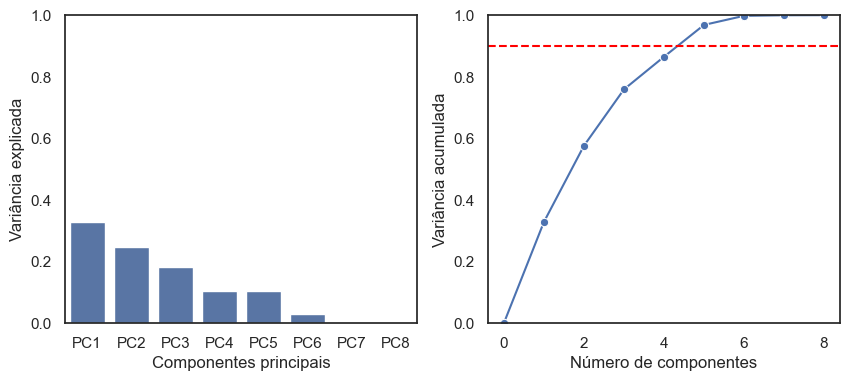

In [69]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

LIMIAR_DE_VARIANCIA = 0.9

nomes_componentes = [f"PC{i+1}" for i in range(X_treino.shape[1])]

df1 = pd.DataFrame({
    "Componentes principais": nomes_componentes,
    "Variância explicada": variancia_explicada,
})

df2 = pd.DataFrame({
    "Número de componentes": np.arange(len(nomes_componentes) + 1),
    "Variância acumulada": np.r_[0, np.cumsum(variancia_explicada)],
})

figura, eixos = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(
    df1,
    x="Componentes principais",
    y="Variância explicada",
    ax=eixos[0],
)
eixos[0].set(ylim=(0.0, 1.0))

sns.lineplot(
    df2,
    x="Número de componentes",
    y="Variância acumulada",
    ax=eixos[1],
    marker="o",
)
eixos[1].set(ylim=(0.0, 1.0))
eixos[1].axhline(LIMIAR_DE_VARIANCIA, linestyle="--", color="red");

Reduzimos o código de X_treino a 5 dimensões. Ele ajusta o modelo PCA aos dados, calculando autovalores (variância explicada por componente) e autovetores (direções dos novos eixos principais). Por fim, exibe esses valores, os quais indicam a quantidade de variância capturada por cada componente e a contribuição das variáveis originais na nova representação dos dados.

In [70]:
from sklearn.decomposition import PCA

NUM_DIMENSOES = 5

pca = PCA(NUM_DIMENSOES)
pca.fit(X_treino)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

print("Autovalores:\n", autovalores)
print()
print("Autovetores:\n", autovetores)

Autovalores:
 [12910.26887628  9730.30382318  7194.55380175  4161.74425206
  4065.41211908]

Autovetores:
 [[ 0.90223879  0.03810084  0.17352929  0.00354444 -0.14371132]
 [-0.26872676  0.78795702  0.06792108 -0.18307831 -0.12598437]
 [-0.23406018 -0.30368204 -0.05310687  0.70222539 -0.10073155]
 [ 0.00665323  0.07175337 -0.03054206  0.06750776  0.10570115]
 [-0.00189859 -0.00428077  0.02197729  0.02293351 -0.02134763]
 [ 0.01326744 -0.25672222 -0.78083098 -0.45225834 -0.11061982]
 [-0.22493942 -0.45784621  0.5852059  -0.51298065  0.06169868]
 [ 0.09025122  0.06894175 -0.09420826  0.02406797  0.9621103 ]]


Criamos, em seguida, uma pipeline que estandariza os dados, reduz a dimensionalidade usando PCA para 5 componentes principais e aplica um regressor de árvore de decisão para prever "Y_treino"

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

NUM_COMPONENTES = 5

modelo = make_pipeline(
    StandardScaler(),
    PCA(NUM_COMPONENTES),
    DecisionTreeRegressor(random_state = 42),
)

modelo.fit(X_treino, Y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Cálculo do RMSE para árvore de decisão com redução da dimensionalidade

In [72]:
from sklearn.metrics import mean_squared_error

modelo.fit(X_treino, Y_treino)

X_verdadeiro = X_teste
y_verdadeiro = Y_teste

y_previsto = modelo.predict(X_verdadeiro)

RMSE = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo da árvore de decisão com PCA foi de {RMSE} unidades de y.")

O RMSE do modelo da árvore de decisão com PCA foi de 12.122634863642144 unidades de y.


### Conclusão

O RMSE foi maior do que o obtido pela otimização de hiperparâmetros. Isso indica que, para o conjunto de dados que estamos trabalhando, reduzir a dimensionalidade não é uma boa forma de aumentar a performance do modelo. No modelo de árvore de decisão, quando duas variáveis são altamente correlacionadas, a árvore de decisão tende a escolher apenas uma delas para o nó, o que ajuda a evitar redundância.  Assim, o PCA, que é eficaz para induzir ortogonalidade (não há correlação entre as componentes), não contibui muito, uma vez que a árvore de decisão executa o mesmo processo de forma eficaz.[10]

### Matriz de Covariância

A matriz de covariância é uma matriz que descreve a covariância entre diferentes variáveis em um conjunto de dados. Ela ajuda a entender como as variáveis variam juntas. A diagonal da matriz contém as variâncias das variáveis, e as posições fora da diagonal contêm as covariâncias entre pares de variáveis. A seguir, temos a matriz de covariância com os dados do dataset.

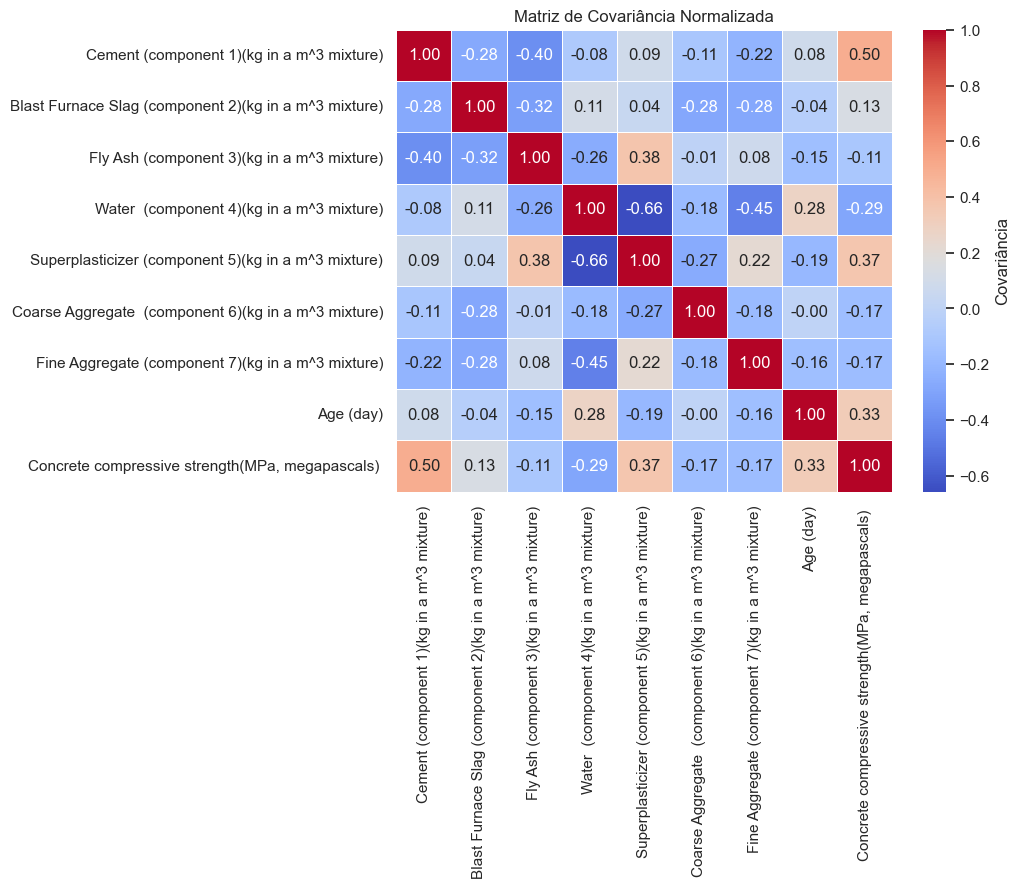

In [73]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

cov_matrix = np.cov(df_scaled, rowvar=False)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cov_matrix, 
    annot=True,  
    cmap='coolwarm',  
    xticklabels=df.columns,  
    yticklabels=df.columns,  
    fmt=".2f",  
    linewidths=0.5, 
    cbar_kws={'label': 'Covariância'} 
)
plt.title("Matriz de Covariância Normalizada")
plt.show()


O código acima foi feito pela referência [7]

### Conclusão

De forma geral, covariâncias positivas indicam que dois componentes tendem a aumentar ou diminuir juntos, como Cimento e Agregado Graúdo, que apresentam uma relação moderada positiva de 0,50. Covariâncias negativas sugerem que, quando um componente aumenta, o outro tende a diminuir, como é o caso da Escória de Alto-Forno e das Cinzas Volantes, que possuem uma relação moderada negativa de -0,40. Valores próximos de zero indicam pouca ou nenhuma correlação, como observado para a Água, que é praticamente independente dos outros componentes.

### Referências:

[1] PEDROSO, Fábio Luís. Concreto: as origens e a evolução do material construtivo mais usado pelo homem. Concreto e construções, v. 53, p. 14-19, 2009. Disponível em: <http://ibracon.org.br/publicacoes/revistas_ibracon/rev_construcao/pdf/revista_concreto_53.pdf>. Acesso em: 8 out. de 2024.

[2] CASTRO, V. G. Cimento Portland. In: Compósitos madeira-cimento: um produto sustentável para o Futuro [online]. Mossoró: EdUFERSA, 2021, pp. 13-21. ISBN: 978-65-87108-26-1. Disponível em: <https://doi.org/10.7476/9786587108612.0002>. Acesso em: 8 de out. de 2024.

[3] BASTOS, Paulo Sérgio. Fundamentos do Concreto Armado: Agregados. Bauru, 2019. Disponível em: <https://wwwp.feb.unesp.br/pbastos/concreto1/Fundamentos%20CA.pdf>. Acesso em: 5 de maio de 2023

[4] IBRACON. Revista IBRACON de Estruturas e Materiais, v. 53, p. 1-18, 2019. Disponível em: http://ibracon.org.br/publicacoes/revistas_ibracon/rev_construcao/pdf/revista_concreto_53.pdf. Acesso em: 10 nov. 2024.

[5] Raschka, Sebastian. Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning. University of Wisconsin–Madison, Department of Statistics, novembro de 2018. Disponível em: https://arxiv.org/pdf/1811.12808. Acesso em: 11 nov. 2024.

[6] IBM. Multiple Linear Regression. Disponível em: https://www.ibm.com/docs/pt-br/cognos-analytics/11.2.0?topic=tests-multiple-linear-regression. Acesso em: 10 nov. 2024.

[7]https://chatgpt.com/c/67316944-3b34-800b-93e0-e3fd581ff22f

[8]https://www.ibm.com/br-pt/topics/principal-component-analysis

[9]https://medium.com/data-hackers/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-faf74e357913

[10]https://www.geeksforgeeks.org/solving-the-multicollinearity-problem-with-decision-tree/

ATP-203 8.1 - Redução de dimensionalidade com PCA

ATP-203 6.1 - Otimização de hiperparâmetros com optuna

ATP-203 4.1 - Árvore de decisão